# Global Terrorism Data Analysis - first python project

# Importing data
Importing data and necessary libraries.

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import matplotlib.mlab as mlab
import scipy.stats
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

# Data description
# Geography: Worldwide
# Time period: 1970-2016, except 1993 (2017 in progress, publication expected June 2018)
# Unit of analysis: Attack
# Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes
# Sources: Unclassified media articles (Note: Please interpret changes over time with caution. 
# Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations 
# in access to media coverage over both time and place.)

# Importing csv data file. 
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False, usecols=[1,2,7,8,9,10,28,29,34,35])

# Displaying analized data
data

,iyear,imonth,country,country_txt,region,region_txt,attacktype1,attacktype1_txt,targtype1,targtype1_txt
0,1970,7,58,Dominican Republic,2,Central America & Caribbean,1,Assassination,14,Private Citizens & Property
1,1970,0,130,Mexico,1,North America,6,Hostage Taking (Kidnapping),7,Government (Diplomatic)
2,1970,1,160,Philippines,5,Southeast Asia,1,Assassination,10,Journalists & Media
3,1970,1,78,Greece,8,Western Europe,3,Bombing/Explosion,7,Government (Diplomatic)
4,1970,1,101,Japan,4,East Asia,7,Facility/Infrastructure Attack,7,Government (Diplomatic)
5,1970,1,217,United States,1,North America,2,Armed Assault,3,Police
6,1970,1,218,Uruguay,3,South America,1,Assassination,3,Police
7,1970,1,217,United States,1,North America,3,Bombing/Explosion,21,Utilities
8,1970,1,217,United States,1,North America,7,Facility/Infrastructure Attack,4,Military
9,1970,1,217,United States,1,North America,7,Facility/Infrastructure Attack,2,Government (General)


# First analysis
"Analysis of number of terrorist attacks during last 40 years"

Basic year-data parameters:
 mean of terrorist attacks per year:  3476.53061224 
 standard deviation:  3670.0890447 
 minimal value of terrorist attacks:  473.0  in:  1972 
 maximal value of terrorist attacks:  16860.0  in:  2013


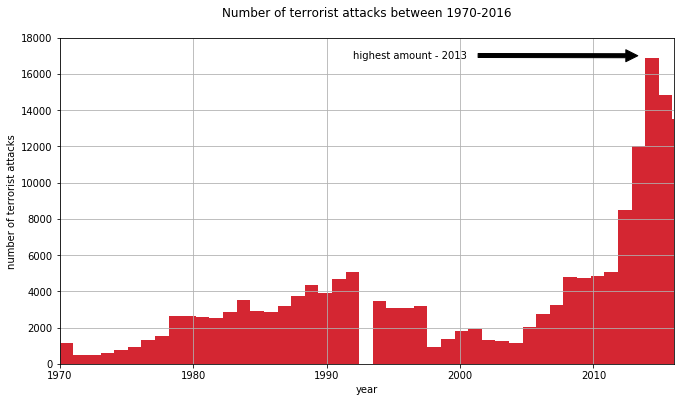

In [2]:
# 1. Analysis of number of terrorist attacks during last 40 years.  

mpl.rcParams["figure.figsize"] = [11,6]

# Data preparation.
year=data['iyear']
years = np.linspace(1970, 2020, 50)
hist_data=mpl.hist(year,years,normed=0,alpha=0.75)

# Calculating basic statistical parameters - mean, standard deviation, max and min value.
year_mean=np.mean(hist_data[0])
year_std=np.std(hist_data[0])
hist_data2 = [x for x in hist_data[0] if x > 0]
year_min=np.amin(hist_data2)
year_max=np.amax(hist_data[0])

AllYears=hist_data[1]
counter=0
for i in hist_data[0]:
    if i == year_min:
        minYear = int(AllYears[counter])
    if i == year_max:
        maxYear = int(AllYears[counter])
    counter=counter+1
              

print('Basic year-data parameters:\n mean of terrorist attacks per year: ',year_mean,'\n standard deviation: ',year_std,
      '\n minimal value of terrorist attacks: ', year_min, ' in: ', minYear, '\n maximal value of terrorist attacks: ',
      year_max, ' in: ', maxYear)

# Plotting data histogram.

mpl.hist(year,years,normed=0,alpha=0.75,facecolor='r')
mpl.xlabel('year')
mpl.ylabel('number of terrorist attacks')
mpl.title('Number of terrorist attacks between 1970-2016\n')
mpl.axis([1970, 2016, 0, 18000])
mpl.grid(True)
mpl.annotate('highest amount - 2013', xy=(2014, 17000), xytext=(1992, 16850),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
mpl.show()

# Second analysis
"Analysis of the regions of the World with regard to the crimes committed there"

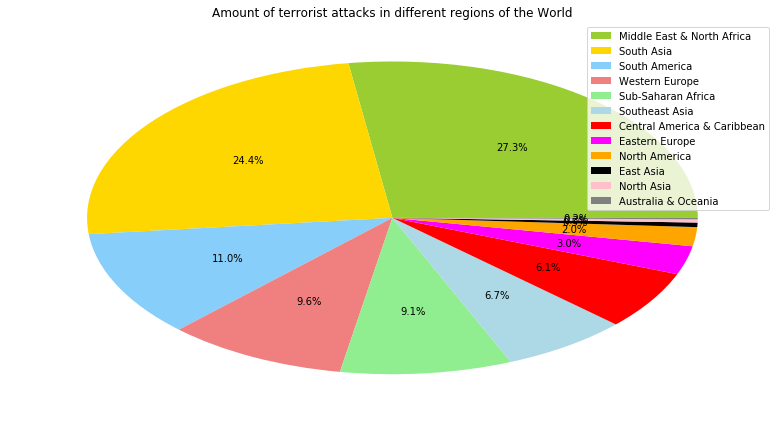

Regions with the most terrorist attacks during last 40 years: Middle East, North Africa and South Asia - 
 more than 50% all crimes commited in the World during last 40 years.


In [3]:
# 2. Analysis of the regions of the World with regard to the crimes committed there.

country=pd.value_counts(data['region_txt'])

mpl.rcParams["figure.figsize"] = [11,6]

# Pie chart showing total amount of terrorist attacks commited in different Worls regions
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'lightblue', 'red', 'magenta', 'orange', 'black', 'pink', 'gray']
mpl.pie(country, autopct='%1.1f%%', colors=colors)
mpl.title('Amount of terrorist attacks in different regions of the World');
labels=['Middle East & North Africa','South Asia','South America','Western Europe','Sub-Saharan Africa','Southeast Asia','Central America & Caribbean','Eastern Europe','North America','East Asia','North Asia','Australia & Oceania']
mpl.legend(labels, loc="best")
mpl.tight_layout()
mpl.show()

print('Regions with the most terrorist attacks during last 40 years: Middle East, North Africa and South Asia - \n more than 50% all crimes commited in the World during last 40 years.')

# Third analysis
"Analysis of terrorists' most popular targets"

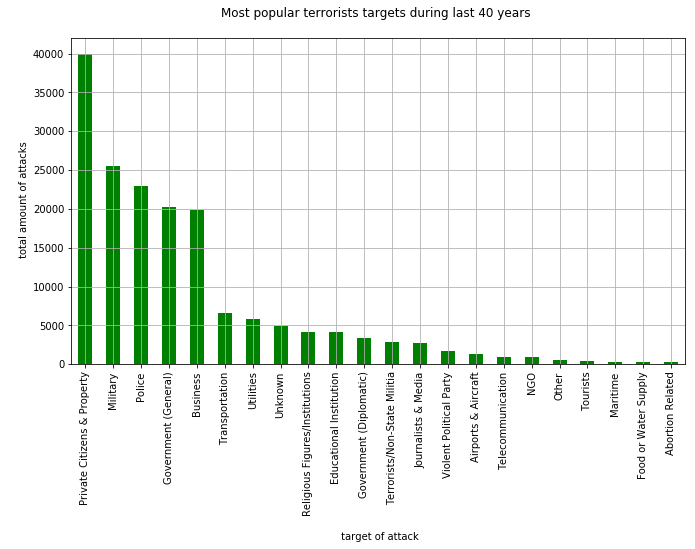

The most popular target: private citizens & property. 



 Number of commited crimes on individual subjects during years: 

 iyear  targtype1_txt                 
1970   Airports & Aircraft                 25
       Business                           136
       Educational Institution             62
       Food or Water Supply                 2
       Government (Diplomatic)             54
       Government (General)                81
       Journalists & Media                  9
       Military                            86
       NGO                                  8
       Other                                1
       Police                              81
       Private Citizens & Property         57
       Religious Figures/Institutions      13
       Telecommunication                    7
       Terrorists/Non-State Militia         4
       Tourists                             2
       Transportation                       2
       Unknown                              4
       Ut

In [4]:
# Analysis of terrorists' most popular targets. 

# Plotting total amount of commited crimes on individual targets.
pd.value_counts(data['targtype1_txt']).plot.bar(color='green', align='center')
mpl.title('Most popular terrorists targets during last 40 years \n');
mpl.xlabel('\n target of attack');
mpl.ylabel('\n total amount of attacks');
mpl.grid(True);
mpl.show()

print('The most popular target: private citizens & property. \n')

# Overall numbers of terrorists attacks on individual targets in every year since 1970. 
aggregated = data.groupby(['iyear', 'targtype1_txt']).count()

print('\n\n Number of commited crimes on individual subjects during years: \n\n', aggregated['imonth'],'\n\n\n')

# Fourth analysis
"Predicting the year and the month of the most crimes commited as specific attack type."

In [5]:
attacksList = list(set(data.attacktype1_txt))

# Preparing data sheet with every kind of terrorists attack, calculating the most popularity of them during years and months.
meanOfKilledYear = []
meanOfKilledMonth = []
print('Date of the biggest popularity every kind of terrorists attack:\n')
for attack in attacksList:
    meanOfKilledYear.append(data.iyear[data.attacktype1_txt == attack].mean())
    meanOfKilledMonth.append(data.imonth[data.attacktype1_txt == attack].mean())
for i, attack in enumerate(attacksList):
    print('{}:\n year:{}, month:{}'.format(attack, round(int(meanOfKilledYear[i])), round(meanOfKilledMonth[i]), 3))

Date of the biggest popularity every kind of terrorists attack:

Bombing/Explosion:
 year:2002, month:6.0
Facility/Infrastructure Attack:
 year:1999, month:6.0
Armed Assault:
 year:2001, month:7.0
Hostage Taking (Barricade Incident):
 year:1992, month:6.0
Hostage Taking (Kidnapping):
 year:2004, month:6.0
Hijacking:
 year:1997, month:7.0
Unknown:
 year:2003, month:7.0
Unarmed Assault:
 year:2002, month:7.0
Assassination:
 year:1995, month:6.0


# Fifth analysis
"4-Target Solution Profiles Across Four Most Dangerous World Regions During Last 7 Years - radar chart based analysis"

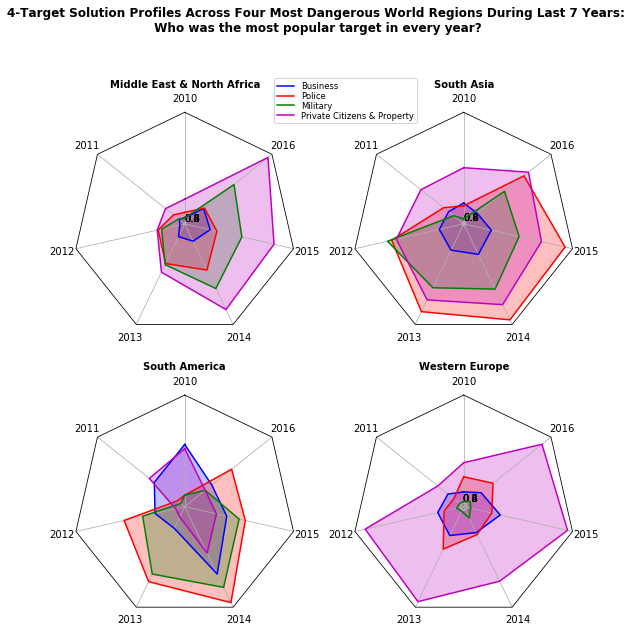

In [6]:
# Preparing basic data
dane = data.groupby(['iyear', 'region_txt', 'targtype1_txt']).count()

# Defining  necessery chart classes
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    def draw_poly_patch(self):
        # rotate theta such that the first axis is at the top
        verts = unit_poly_verts(theta + np.pi / 2)
        return mpl.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return mpl.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def __init__(self, *args, **kwargs):
            super(RadarAxes, self).__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta + np.pi / 2)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

# Preparing data for every chart
def example_data():
    
    data = [
        ['2010', '2011', '2012', '2013', '2014', '2015', '2016'],
        ('Middle East & North Africa', [
            [dane['imonth'][2010]['Middle East & North Africa']['Business'], dane['imonth'][2011]['Middle East & North Africa']['Business'], dane['imonth'][2012]['Middle East & North Africa']['Business'], dane['imonth'][2013]['Middle East & North Africa']['Business'], dane['imonth'][2014]['Middle East & North Africa']['Business'], dane['imonth'][2015]['Middle East & North Africa']['Business'], dane['imonth'][2016]['Middle East & North Africa']['Business']],
            [dane['imonth'][2010]['Middle East & North Africa']['Police'], dane['imonth'][2011]['Middle East & North Africa']['Police'], dane['imonth'][2012]['Middle East & North Africa']['Police'], dane['imonth'][2013]['Middle East & North Africa']['Police'], dane['imonth'][2014]['Middle East & North Africa']['Police'], dane['imonth'][2015]['Middle East & North Africa']['Police'], dane['imonth'][2016]['Middle East & North Africa']['Police']],
            [dane['imonth'][2010]['Middle East & North Africa']['Military'], dane['imonth'][2011]['Middle East & North Africa']['Military'], dane['imonth'][2012]['Middle East & North Africa']['Military'], dane['imonth'][2013]['Middle East & North Africa']['Military'], dane['imonth'][2014]['Middle East & North Africa']['Military'], dane['imonth'][2015]['Middle East & North Africa']['Military'], dane['imonth'][2016]['Middle East & North Africa']['Military']],
            [dane['imonth'][2010]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2011]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2012]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2013]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2014]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2015]['Middle East & North Africa']['Private Citizens & Property'], dane['imonth'][2016]['Middle East & North Africa']['Private Citizens & Property']]]),
        ('South Asia', [
            [dane['imonth'][2010]['South Asia']['Business'], dane['imonth'][2011]['South Asia']['Business'], dane['imonth'][2012]['South Asia']['Business'], dane['imonth'][2013]['South Asia']['Business'], dane['imonth'][2014]['South Asia']['Business'], dane['imonth'][2015]['South Asia']['Business'], dane['imonth'][2016]['South Asia']['Business']],
            [dane['imonth'][2010]['South Asia']['Police'], dane['imonth'][2011]['South Asia']['Police'], dane['imonth'][2012]['South Asia']['Police'], dane['imonth'][2013]['South Asia']['Police'], dane['imonth'][2014]['South Asia']['Police'], dane['imonth'][2015]['South Asia']['Police'], dane['imonth'][2016]['South Asia']['Police']],
            [dane['imonth'][2010]['South Asia']['Military'], dane['imonth'][2011]['South Asia']['Military'], dane['imonth'][2012]['South Asia']['Military'], dane['imonth'][2013]['South Asia']['Military'], dane['imonth'][2014]['South Asia']['Military'], dane['imonth'][2015]['South Asia']['Military'], dane['imonth'][2016]['South Asia']['Military']],
            [dane['imonth'][2010]['South Asia']['Private Citizens & Property'], dane['imonth'][2011]['South Asia']['Private Citizens & Property'], dane['imonth'][2012]['South Asia']['Private Citizens & Property'], dane['imonth'][2013]['South Asia']['Private Citizens & Property'], dane['imonth'][2014]['South Asia']['Private Citizens & Property'], dane['imonth'][2015]['South Asia']['Private Citizens & Property'], dane['imonth'][2016]['South Asia']['Private Citizens & Property']]]),
        ('South America', [
            [dane['imonth'][2010]['South America']['Business'], dane['imonth'][2011]['South America']['Business'], dane['imonth'][2012]['South America']['Business'], dane['imonth'][2013]['South America']['Business'], dane['imonth'][2014]['South America']['Business'], dane['imonth'][2015]['South America']['Business'], dane['imonth'][2016]['South America']['Business']],
            [dane['imonth'][2010]['South America']['Police'], dane['imonth'][2011]['South America']['Police'], dane['imonth'][2012]['South America']['Police'], dane['imonth'][2013]['South America']['Police'], dane['imonth'][2014]['South America']['Police'], dane['imonth'][2015]['South America']['Police'], dane['imonth'][2016]['South America']['Police']],
            [dane['imonth'][2010]['South America']['Military'], dane['imonth'][2011]['South America']['Military'], dane['imonth'][2012]['South America']['Military'], dane['imonth'][2013]['South America']['Military'], dane['imonth'][2014]['South America']['Military'], dane['imonth'][2015]['South America']['Military'], dane['imonth'][2016]['South America']['Military']],
            [dane['imonth'][2010]['South America']['Private Citizens & Property'], dane['imonth'][2011]['South America']['Private Citizens & Property'], dane['imonth'][2012]['South America']['Private Citizens & Property'], dane['imonth'][2013]['South America']['Private Citizens & Property'], dane['imonth'][2014]['South America']['Private Citizens & Property'], dane['imonth'][2015]['South America']['Private Citizens & Property'], dane['imonth'][2016]['South America']['Private Citizens & Property']]]),
        ('Western Europe', [
            [dane['imonth'][2010]['Western Europe']['Business'], dane['imonth'][2011]['Western Europe']['Business'], dane['imonth'][2012]['Western Europe']['Business'], dane['imonth'][2013]['Western Europe']['Business'], dane['imonth'][2014]['Western Europe']['Business'], dane['imonth'][2015]['Western Europe']['Business'], dane['imonth'][2016]['Western Europe']['Business']],
            [dane['imonth'][2010]['Western Europe']['Police'], dane['imonth'][2011]['Western Europe']['Police'], dane['imonth'][2012]['Western Europe']['Police'], dane['imonth'][2013]['Western Europe']['Police'], dane['imonth'][2014]['Western Europe']['Police'], dane['imonth'][2015]['Western Europe']['Police'], dane['imonth'][2016]['Western Europe']['Police']],
            [dane['imonth'][2010]['Western Europe']['Military'], dane['imonth'][2011]['Western Europe']['Military'], dane['imonth'][2012]['Western Europe']['Military'], dane['imonth'][2013]['Western Europe']['Military'], dane['imonth'][2014]['Western Europe']['Military'], dane['imonth'][2015]['Western Europe']['Military'], dane['imonth'][2016]['Western Europe']['Military']],
            [dane['imonth'][2010]['Western Europe']['Private Citizens & Property'], dane['imonth'][2011]['Western Europe']['Private Citizens & Property'], dane['imonth'][2012]['Western Europe']['Private Citizens & Property'], dane['imonth'][2013]['Western Europe']['Private Citizens & Property'], dane['imonth'][2014]['Western Europe']['Private Citizens & Property'], dane['imonth'][2015]['Western Europe']['Private Citizens & Property'], dane['imonth'][2016]['Western Europe']['Private Citizens & Property']]]),
    ]
    return data


if __name__ == '__main__':
    N = 7
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = mpl.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Business', 'Police', 'Military', 'Private Citizens & Property')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '4-Target Solution Profiles Across Four Most Dangerous World Regions During Last 7 Years:\n Who was the most popular target in every year?',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    mpl.show()